<a href="https://colab.research.google.com/github/chixchix/Kebees-Kitchen/blob/main/Chapter_1_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup & Load Data

This is to load & transform the data for your use. Don't modify this section!


In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ensure randomness is stable
np.random.seed(42)

In [75]:
# Download and prepare the data
# OEDC = https://data-explorer.oecd.org/vis?tenant=archive&df[ds]=DisseminateArchiveDMZ&df[id]=DF_BLI&df[ag]=OECD
#

data_root = "https://github.com/ageron/data/raw/main/"
raw_gdp = pd.read_csv(data_root + "lifesat/gdp_per_capita.csv")
raw_oecd = pd.read_csv(data_root + "lifesat/oecd_bli.csv")
lifesat_col = "Life satisfaction"

In [76]:
# Prepare GDP dataset

# Limit GDP year to 2020
gdp_year = 2020
gdp = raw_gdp[raw_gdp["Year"] == gdp_year].copy()  # always create a copy

# Extract GDP & Country columns
gdppc_col = "GDP per capita (USD)"
gdp = gdp.drop(["Code", "Year"], axis=1)
gdp.columns = ["Country", gdppc_col]
gdp.set_index("Country", inplace=True)

gdp.head()

,GDP per capita (USD)
Country,
Afghanistan,1978.961579
Africa Eastern and Southern,3387.594670
Africa Western and Central,4003.158913
Albania,13295.410885
Algeria,10681.679297


In [77]:
# Prepare OECD dataset

oecd = raw_oecd[raw_oecd["INEQUALITY"] == "TOT"]
oecd = oecd.pivot(index="Country", columns="Indicator", values="Value")

oecd.head()

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,...,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,...,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0
Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,21.0,...,49675.0,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,...,NaN,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2
Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,22.0,...,47622.0,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3


In [78]:
# Finalize life-satisfaction dataset

life_sat = oecd.join(gdp, how="inner")
life_sat

,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,GDP per capita (USD)
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,...,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0,48697.837028
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,...,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0,51935.603862
Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,21.0,...,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3,48210.033111
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,...,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2,14063.982505
Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,22.0,...,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3,45856.625626
Chile,16.0,9.4,65.0,9.72,63.0,47.9,4.2,NaN,100967.0,18.0,...,85.0,1.2,57.0,1.3,443.0,NaN,47.0,71.0,17.5,23324.524751
Colombia,10.0,23.9,54.0,26.56,67.0,44.4,24.5,NaN,NaN,17.0,...,89.0,1.2,NaN,1.4,410.0,NaN,53.0,75.0,14.1,13441.492952
Denmark,9.0,0.5,81.0,2.34,74.0,83.5,0.6,29606.0,118637.0,23.0,...,95.0,1.9,71.0,2.0,504.0,15.87,86.0,95.0,19.5,55938.212809
Estonia,8.0,7.0,89.0,2.42,74.0,69.0,3.1,19697.0,159373.0,17.0,...,92.0,1.6,53.0,2.7,524.0,14.90,64.0,84.0,17.7,35638.421351


# Your Work
All modifications should start here! Ensure you place your work & graphs below this markdown block.

In [79]:
# Start coding here!

life_sat.head()

,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,GDP per capita (USD)
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,...,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0,48697.837028
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,...,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0,51935.603862
Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,21.0,...,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3,48210.033111
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,...,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2,14063.982505
Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,22.0,...,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3,45856.625626


In [80]:
life_sat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, Australia to United States
Data columns (total 25 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Air pollution                                      36 non-null     float64
 1   Dwellings without basic facilities                 33 non-null     float64
 2   Educational attainment                             36 non-null     float64
 3   Employees working very long hours                  36 non-null     float64
 4   Employment rate                                    36 non-null     float64
 5   Feeling safe walking alone at night                36 non-null     float64
 6   Homicide rate                                      36 non-null     float64
 7   Household net adjusted disposable income           25 non-null     float64
 8   Household net wealth                               25 non-null     float64
 9 

**Analysis of .info()**

From here this method I analyzed my options to pick features with no more than 5 missing values.

My first choice of 3 features are

*   dwellings without basic facilities ( 3 Nan values)
*   Educational attainment (0 Nan value)
*   Quality of support network (0 Nan)

I decided to fill up the missing values with the mean of the valuses in the dwellings without basic facilities feature. Because the 3 values is about less than 9% of our data using the average does not significantly or even at all change the mean. I believe as of now the only effect will be on the variety of values we have the data will have less of it but not significant enough to make huge changes.







In [81]:
new_columns = ["Dwellings without basic facilities", "Educational attainment", "Quality of support network"]
new_life_sat = life_sat[new_columns].copy()
new_life_sat.head()

,Dwellings without basic facilities,Educational attainment,Quality of support network
Country,,,
Australia,NaN,81.0,95.0
Austria,0.9,85.0,92.0
Belgium,1.9,77.0,91.0
Brazil,6.7,49.0,90.0
Canada,0.2,91.0,93.0


In [ ]:
new_life_sat = life_sat[new_columns].copy()
var='Dwellings without basic facilities'
dwell_mean= new_life_sat[var].mean()
print(dwell_mean)
new_life_sat[var] = new_life_sat[var].fillna(dwell_mean)
new_life_sat

5.363636363636362


,Dwellings without basic facilities,Educational attainment,Quality of support network
Country,,,
Australia,5.363636,81.0,95.0
Austria,0.900000,85.0,92.0
Belgium,1.900000,77.0,91.0
Brazil,6.700000,49.0,90.0
Canada,0.200000,91.0,93.0
Chile,9.400000,65.0,85.0
Colombia,23.900000,54.0,89.0
Denmark,0.500000,81.0,95.0
Estonia,7.000000,89.0,92.0


After looking at the values in the "Dwellings without basic facilities" values with most of the values being aproximately zero. Which means the value is heavly skewed so i decided to choose the median to be more representative of that feature.

In [82]:
new_life_sat = life_sat[new_columns].copy()
var='Dwellings without basic facilities'
dwell_median= new_life_sat[var].median()
print(dwell_median)
new_life_sat[var]=new_life_sat[var].fillna(dwell_median)
new_life_sat

0.7


,Dwellings without basic facilities,Educational attainment,Quality of support network
Country,,,
Australia,0.7,81.0,95.0
Austria,0.9,85.0,92.0
Belgium,1.9,77.0,91.0
Brazil,6.7,49.0,90.0
Canada,0.2,91.0,93.0
Chile,9.4,65.0,85.0
Colombia,23.9,54.0,89.0
Denmark,0.5,81.0,95.0
Estonia,7.0,89.0,92.0


**Number 2**

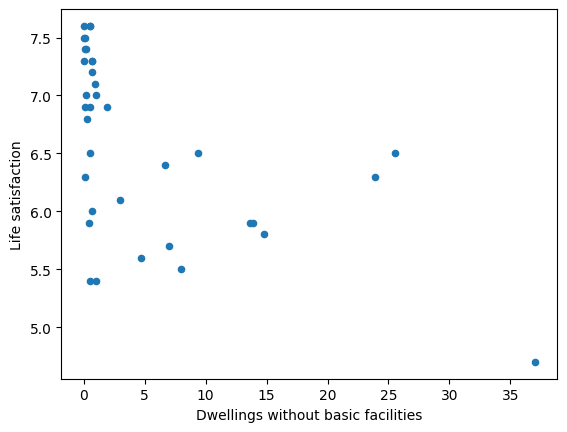

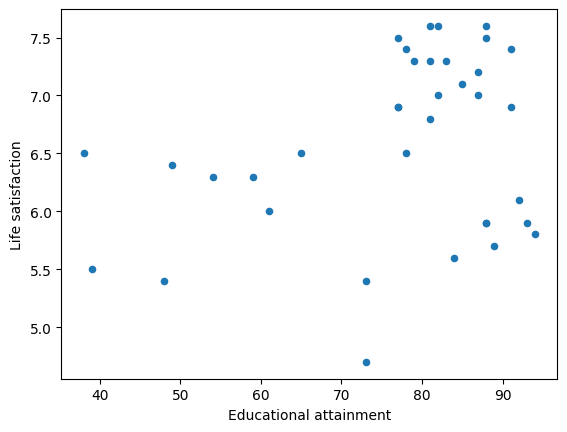

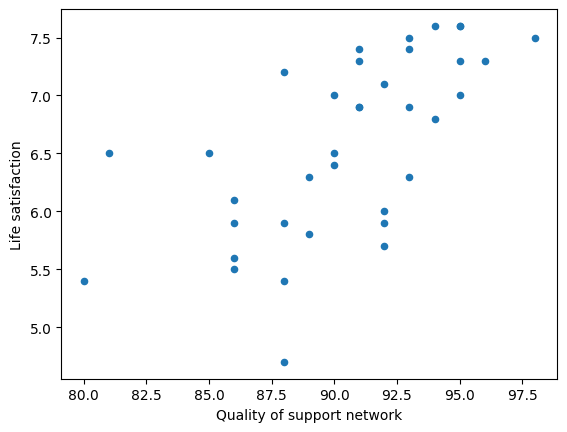

In [85]:
new_life_sat['Life satisfaction'] = life_sat['Life satisfaction']
def scatter_plots(x,y):
  new_life_sat.plot.scatter(x,y)
  plt.xlabel(x)
  plt.ylabel(y)

  #display plot
  plt.show()

new_columns = ["Dwellings without basic facilities", "Educational attainment", "Quality of support network"]
for i in new_columns:
  scatter_plots(i,'Life satisfaction')




**Number 3**

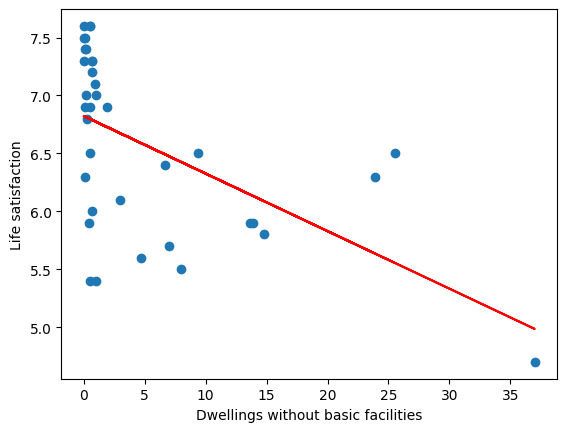

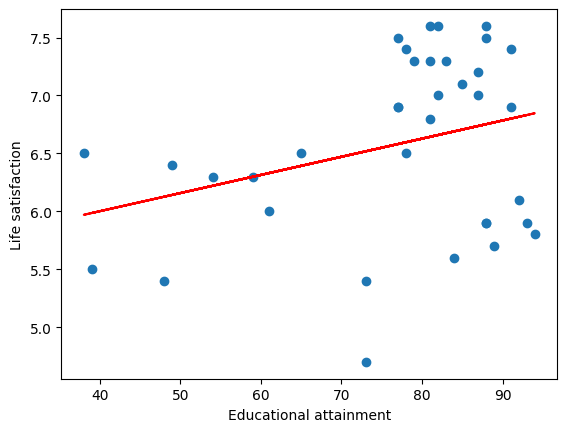

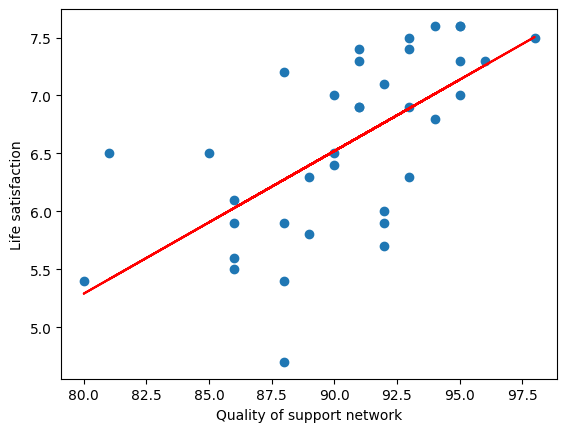

In [90]:
from sklearn.linear_model import LinearRegression

def pred_function():
  model = LinearRegression()
  y = life_sat['Life satisfaction'].copy()

  new_columns = ["Dwellings without basic facilities", "Educational attainment", "Quality of support network"]
  for i in new_columns:
    model.fit(new_life_sat[[i]],y)
    y_pred = model.predict(new_life_sat[[i]])
    plt.scatter(new_life_sat[i], y)
    plt.plot(new_life_sat[i], y_pred, color='red')

    plt.xlabel(i)
    plt.ylabel('Life satisfaction')
    plt.show() # Displays the plot immediately and clears the workspace

pred_function()

**Number 4**

jcoe